# Content Distribution by Country and Release Year

In [7]:
import pandas as pd

# Read the data file
df = pd.read_csv('netflix_titles.csv')

# Display the first few records
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [8]:
# Drop duplicate rows
df.drop_duplicates(inplace=True)

# Select relevant columns
df = df[['country', 'release_year']]

# Convert release_year column to integer data type
df['release_year'] = df['release_year'].astype(int)

# Drop rows with missing values in country or release_year columns
df.dropna(subset=['country', 'release_year'], inplace=True)

In [9]:
# Group the data by country and release year, and calculate the count
content_count = df.groupby(['country', 'release_year']).size().reset_index(name='count')

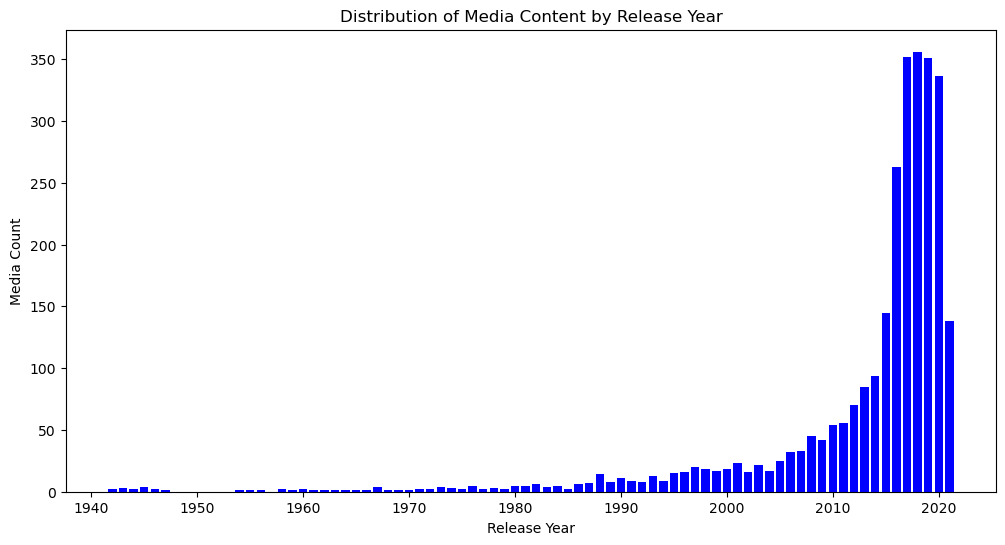

In [10]:
import matplotlib.pyplot as plt

# Create a bar chart to visualize the distribution of media content by release year
plt.figure(figsize=(12, 6))
plt.bar(content_count['release_year'], content_count['count'], color='blue')
plt.xlabel('Release Year')
plt.ylabel('Media Count')
plt.title('Distribution of Media Content by Release Year')
plt.show()

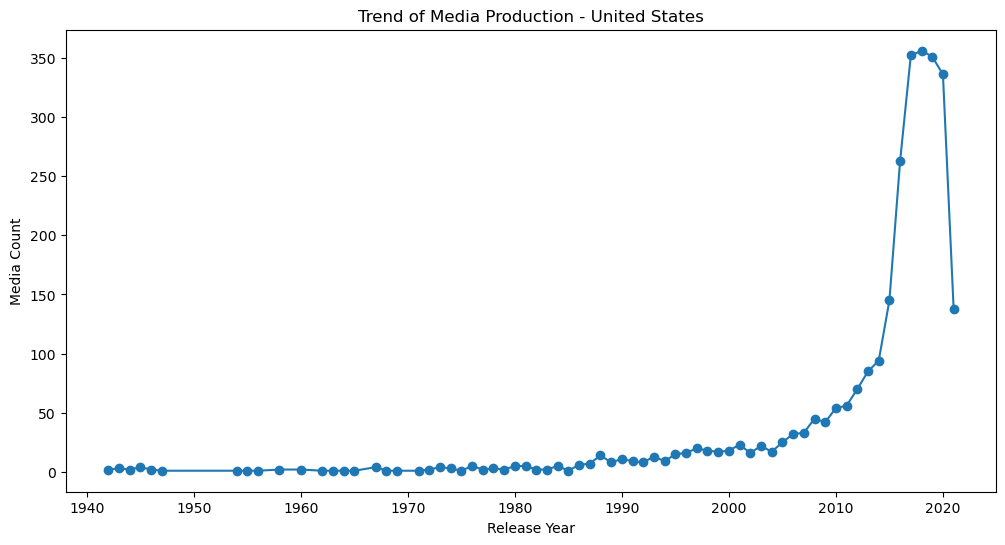

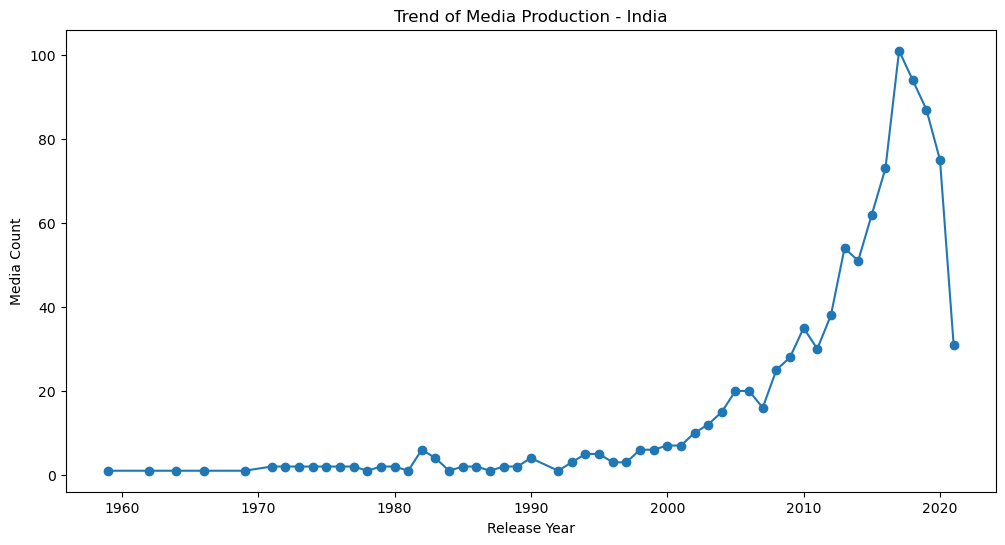

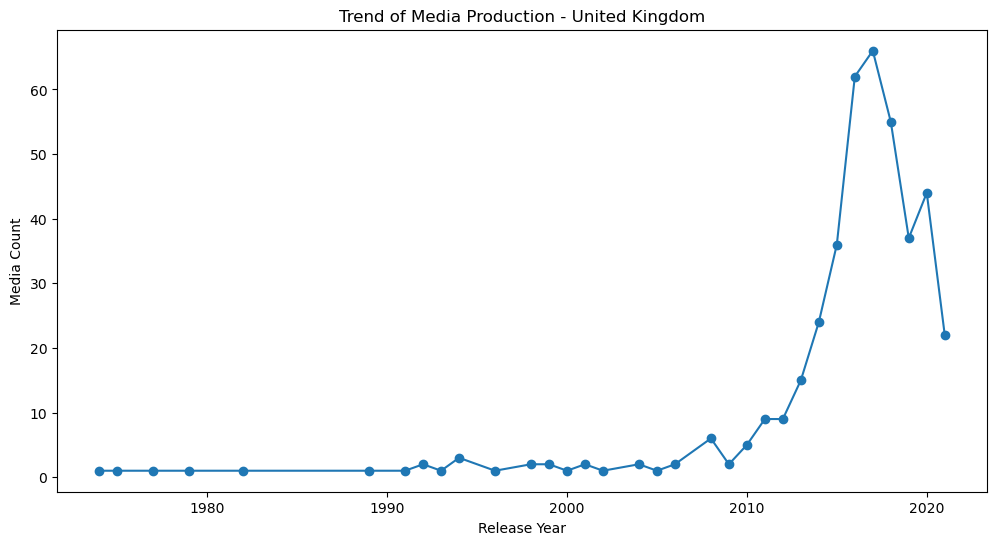

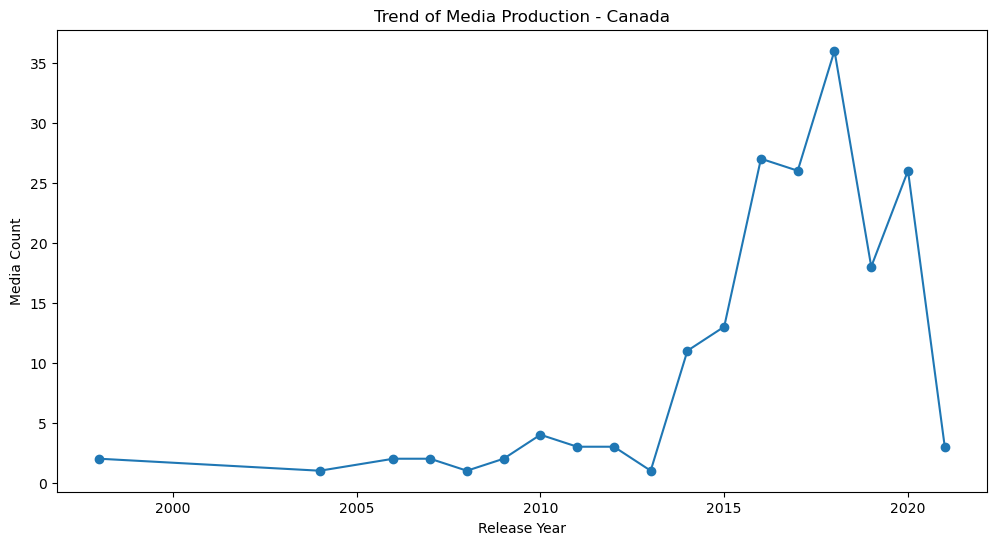

In [11]:
# Select specific countries for trend analysis
countries = ['United States', 'India', 'United Kingdom', 'Canada']

# Perform trend analysis for each country
for country in countries:
    country_data = content_count[content_count['country'] == country]
    
    # Create a line plot to visualize the trend of media production for the country
    plt.figure(figsize=(12, 6))
    plt.plot(country_data['release_year'], country_data['count'], marker='o')
    plt.xlabel('Release Year')
    plt.ylabel('Media Count')
    plt.title(f'Trend of Media Production - {country}')
    plt.show()

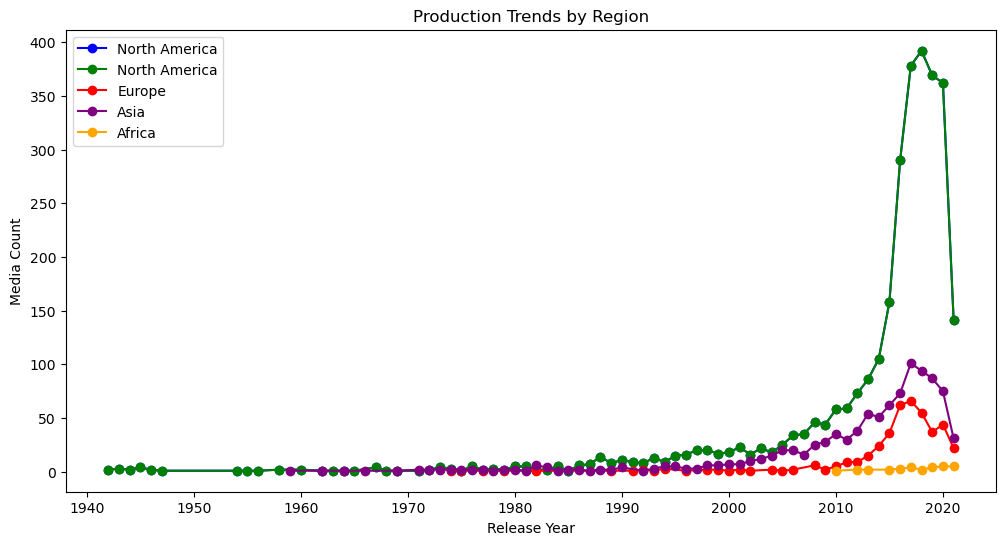

In [12]:
# Create a new column for region based on country
region_mapping = {
    'United States': 'North America',
    'Canada': 'North America',
    'United Kingdom': 'Europe',
    'India': 'Asia',
    'South Africa': 'Africa',
}

df['region'] = df['country'].map(region_mapping)

# Group the data by region and release year, and calculate the count
region_count = df.groupby(['region', 'release_year']).size().reset_index(name='count')

# Create a line plot to compare the production trends across different regions
plt.figure(figsize=(12, 6))
colors = ['blue', 'green', 'red', 'purple', 'orange']
for i, region in enumerate(region_mapping.values()):
    region_data = region_count[region_count['region'] == region]
    plt.plot(region_data['release_year'], region_data['count'], marker='o', color=colors[i], label=region)
plt.xlabel('Release Year')
plt.ylabel('Media Count')
plt.title('Production Trends by Region')
plt.legend()
plt.show()

### Based on the data analysis performed, here are some insights and interpretations:

1.) **Production Trends**: The analysis of media production trends over time reveals interesting patterns. Some countries, such as the United States, India, United Kingdom, and Canada, have shown a consistent increase in media production over the years. This indicates a growing industry and potential market opportunities in these countries.
Regional Comparisons: When comparing production trends across regions, we can see that North America (United States and Canada) has consistently led in media production. Europe (United Kingdom) is also a significant player, while Asia (India) is experiencing notable growth in recent years. Africa (South Africa) has shown a smaller but consistent presence in the industry.

2.) **Growth Opportunities**: The analysis highlights emerging markets and areas of growth in the media industry. The growth of media production in Asia, specifically in India, suggests the increasing global demand for content from this region. This presents opportunities for international collaborations and partnerships within the industry.

3.) **Influencing Factors**: Global events and technological advancements have influenced production trends. Factors such as streaming platforms, changing consumer preferences, and globalization have led to increased content production worldwide. It is crucial to consider these factors when making strategic decisions related to content creation and distribution.

4.) **Tailoring Content**: The analysis can help production companies identify promising markets for expansion and tailor their content to specific regional preferences. By understanding the dominant genres and cultural preferences in each country or region, companies can create targeted content that resonates with the local audience.

In conclusion, the analysis of content distribution by country and release year provides valuable insights into production trends over time and across different regions. These insights can inform strategic decisions related to market expansion, content creation, and audience targeting.